In [8]:
import time 
import re
import csv
from getpass import getpass
from time import sleep
from random import randint
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import WebDriverException
from selenium.webdriver.common.keys import Keys
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def get_tweet_data(card):
    """Extract data from tweet card"""
    username = card.find_element("xpath",'.//span').text
    try:
        handle = card.find_element("xpath",'.//span[contains(text(), "@")]').text
    except NoSuchElementException:
        return
    
    
    comment = card.find_element("xpath",'.//div[@data-testid="tweetText"]').text
    responding = card.find_element("xpath",'.//div[2]/div[2]/div[2]').text
    text = comment + responding
    reply_cnt = card.find_element("xpath",'.//div[@data-testid="reply"]').text
    retweet_cnt = card.find_element("xpath",'.//div[@data-testid="retweet"]').text
    like_cnt = card.find_element("xpath",'.//div[@data-testid="like"]').text

    
    tweet = (username, handle, text, reply_cnt, retweet_cnt, like_cnt)
    return tweet  

In [10]:
search_term = input('search term: ')

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://twitter.com/search")
driver.maximize_window()
sleep(5)

# find search input and search for term
search_input = driver.find_element("xpath",'//input[@aria-label="Search query"]')
search_input.send_keys(search_term)
search_input.send_keys(Keys.RETURN)
sleep(5)

# navigate to historical 'latest' tab
driver.find_element("link text",'Top').click()

search term: iPhone


In [11]:
# get all tweets on the page
data = []
tweet_ids = set()
last_position = driver.execute_script("return window.pageYOffset;")
scrolling = True

while scrolling:
    page_cards = driver.find_elements("xpath",'//article[@data-testid="tweet"]')
    for card in page_cards[-15:]:
        tweet = get_tweet_data(card)
        if tweet:
            tweet_id = ''.join(tweet)
            if tweet_id not in tweet_ids:
                tweet_ids.add(tweet_id)
                data.append(tweet)
            
    scroll_attempt = 0
    while True:
        # check scroll position
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        sleep(5)
        curr_position = driver.execute_script("return window.pageYOffset;")
        if last_position == curr_position:
            scroll_attempt += 1
            
            # end of scroll region
            if scroll_attempt >= 3:
                scrolling = False
                break
            else:
                sleep(5) # attempt another scroll
        else:
            last_position = curr_position
            break

# close the web driver
driver.close()

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=111.0.5563.147)
Stacktrace:
Backtrace:
	(No symbol) [0x00C8DCE3]
	(No symbol) [0x00C239D1]
	(No symbol) [0x00B34DA8]
	(No symbol) [0x00B376FB]
	(No symbol) [0x00B375D0]
	(No symbol) [0x00B37850]
	(No symbol) [0x00B5FDF8]
	(No symbol) [0x00B603AB]
	(No symbol) [0x00B587D1]
	(No symbol) [0x00B7AF14]
	(No symbol) [0x00B58726]
	(No symbol) [0x00B7B224]
	(No symbol) [0x00B8D57C]
	(No symbol) [0x00B7ACC6]
	(No symbol) [0x00B56F68]
	(No symbol) [0x00B580CD]
	GetHandleVerifier [0x00F03832+2506274]
	GetHandleVerifier [0x00F39794+2727300]
	GetHandleVerifier [0x00F3E36C+2746716]
	GetHandleVerifier [0x00D36690+617600]
	(No symbol) [0x00C2C712]
	(No symbol) [0x00C31FF8]
	(No symbol) [0x00C320DB]
	(No symbol) [0x00C3C63B]
	BaseThreadInitThunk [0x76F37D69+25]
	RtlInitializeExceptionChain [0x77B1B74B+107]
	RtlClearBits [0x77B1B6CF+191]


In [12]:
with open('dataset_tweets.csv', 'w', newline='', encoding='utf-8') as f:
    header = ['UserName', 'Handle', 'Text', 'Comments', 'Likes', 'Retweets']
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(data)

In [13]:
from wordcloud import wordcloud

In [14]:
tweetwd = pd.read_csv('dataset_tweets.csv')
tweetwd

,UserName,Handle,Text,Comments,Likes,Retweets
0,♔,@regalkv,When Taehyung drew over his iPhone and wrote ‘...,13.0,425,"3,265"
1,Laura,@Lauracutieb,Me or iPhone 14?Me or iPhone 14?,397.0,390,13.5K
2,迷状況集,@mei_situation,iPhoneのカメラ性能が良すぎる人iPhoneのカメラ性能が良すぎる人,55.0,"1,388",16.3K
3,Rowan Cheung,@rowancheung,Interesting find: OpenAI is hiring an iOS deve...,17.0,24,144
4,tweetie,@shaunromy,iPhone flash photography is something!iPhone f...,22.0,24,"1,314"
...,...,...,...,...,...,...
84,Tania Bazai (Humanist),@bazai_tania,kaha hai #AuratMarch2023\nKernay wali aunties&...,9.0,14,70
85,Omogebisi Rhodes Vivour,@Omogebisi,*Dating the actual love of my life \n*Moved ou...,6.0,6,34
86,Obinna,@MaziRayza,"We need to trend ""who recorded the call"" becau...",2.0,7,12
87,ASAKE †,@Alexanderzito_,Thank God for Kiwi Browser. \n\nIPhone people ...,16.0,2,35


In [15]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("dataset_tweets.csv")

# Drop the columns you want to remove
df = df.drop(columns=["UserName", "Handle","Comments","Likes","Retweets"])

# Write the updated DataFrame to a new CSV file
df.to_csv("updated.csv", index=False)
df

,Text
0,When Taehyung drew over his iPhone and wrote ‘...
1,Me or iPhone 14?Me or iPhone 14?
2,iPhoneのカメラ性能が良すぎる人iPhoneのカメラ性能が良すぎる人
3,Interesting find: OpenAI is hiring an iOS deve...
4,iPhone flash photography is something!iPhone f...
...,...
84,kaha hai #AuratMarch2023\nKernay wali aunties&...
85,*Dating the actual love of my life \n*Moved ou...
86,"We need to trend ""who recorded the call"" becau..."
87,Thank God for Kiwi Browser. \n\nIPhone people ...


In [16]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')



#actual pre-processing
lemmatizer = WordNetLemmatizer()
for index,row in df.iterrows():
    filter_sentence = []
    sentence = row['Text']
    sentence = re.sub(r'[^\w\s]','',sentence)
    words = nltk.word_tokenize(sentence)
    words = [w for w in words if not w in stop_words]
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word))
    print(filter_sentence)
    df.loc[index,'Text'] = filter_sentence


['When', 'Taehyung', 'drew', 'iPhone', 'wrote', 'Samsung', 'itWhen', 'Taehyung', 'drew', 'iPhone', 'wrote', 'Samsung']
['Me', 'iPhone', '14Me', 'iPhone', '14']
['iPhoneのカメラ性能が良すぎる人iPhoneのカメラ性能が良すぎる人']
['Interesting', 'find', 'OpenAI', 'hiring', 'iOS', 'developer', 'A', 'ChatGPT', 'iPhone', 'app', 'might', 'coming', 'soon', 'Interesting', 'find', 'OpenAI', 'hiring', 'iOS', 'developer', 'A', 'ChatGPT', 'iPhone', 'app', 'might', 'coming', 'soon']
['iPhone', 'flash', 'photography', 'somethingiPhone', 'flash', 'photography', 'something']
['Me', 'iphone', '14Me', 'iphone', '14']
['I', 'use', 'iPhone', 'I', 'use', 'iPhone', 'Las', 'Las', 'na', 'iPhone', '6', 'u', 'Dey', 'use', 'Werey', 'I', 'use', 'iPhone', 'I', 'use', 'iPhone', 'Las', 'Las', 'na', 'iPhone', '6', 'u', 'Dey', 'use', 'Werey']
['Locals', 'PISSED', 'The', 'Queen', '1', 'iPhone', '5C', '6', 'weeksLocals', 'PISSED', 'The', 'Queen', '1', 'iPhone', '5C', '6', 'week']
['London', 'Uk', 'iPhone', '14', 'pro', 'Street', 'Photography', 'L

In [24]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
df

,Text
0,"[When, Taehyung, drew, iPhone, wrote, Samsung,..."
1,"[Me, iPhone, 14Me, iPhone, 14]"
2,[iPhoneのカメラ性能が良すぎる人iPhoneのカメラ性能が良すぎる人]
3,"[Interesting, find, OpenAI, hiring, iOS, devel..."
4,"[iPhone, flash, photography, somethingiPhone, ..."
...,...
84,"[kaha, hai, AuratMarch2023, Kernay, wali, aunt..."
85,"[Dating, actual, love, life, Moved, parent, ho..."
86,"[We, need, trend, recorded, call, Android, can..."
87,"[Thank, God, Kiwi, Browser, IPhone, people, ca..."


In [18]:
sentences = []

# loop through each row of the data
for index, row in df.iterrows():
    # concatenate the values of each row into a single string
    sentence = ' '.join([str(value) for value in row.values])
    # append the sentence to the list
    sentences.append(sentence)

# combine all sentences into one string, separated by a space
combined_sentence = ' '.join(sentences)

# print or do something with the combined sentence
print(combined_sentence)

['When', 'Taehyung', 'drew', 'iPhone', 'wrote', 'Samsung', 'itWhen', 'Taehyung', 'drew', 'iPhone', 'wrote', 'Samsung'] ['Me', 'iPhone', '14Me', 'iPhone', '14'] ['iPhoneのカメラ性能が良すぎる人iPhoneのカメラ性能が良すぎる人'] ['Interesting', 'find', 'OpenAI', 'hiring', 'iOS', 'developer', 'A', 'ChatGPT', 'iPhone', 'app', 'might', 'coming', 'soon', 'Interesting', 'find', 'OpenAI', 'hiring', 'iOS', 'developer', 'A', 'ChatGPT', 'iPhone', 'app', 'might', 'coming', 'soon'] ['iPhone', 'flash', 'photography', 'somethingiPhone', 'flash', 'photography', 'something'] ['Me', 'iphone', '14Me', 'iphone', '14'] ['I', 'use', 'iPhone', 'I', 'use', 'iPhone', 'Las', 'Las', 'na', 'iPhone', '6', 'u', 'Dey', 'use', 'Werey', 'I', 'use', 'iPhone', 'I', 'use', 'iPhone', 'Las', 'Las', 'na', 'iPhone', '6', 'u', 'Dey', 'use', 'Werey'] ['Locals', 'PISSED', 'The', 'Queen', '1', 'iPhone', '5C', '6', 'weeksLocals', 'PISSED', 'The', 'Queen', '1', 'iPhone', '5C', '6', 'week'] ['London', 'Uk', 'iPhone', '14', 'pro', 'Street', 'Photography', 'L

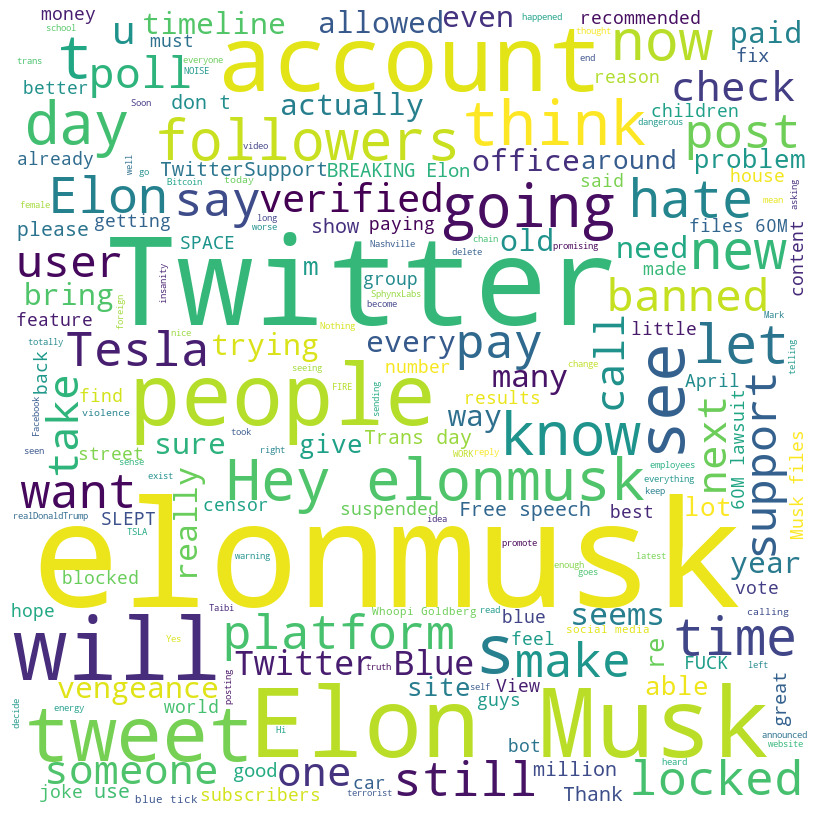

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv('dataset_tweets.csv')
text_column = 'Text'
text = ' '.join(df[text_column])

wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [9]:
sentences = []

# loop through each row of the data
for index, row in df.iterrows():
    # concatenate the values of each row into a single string
    sentence = ' '.join([str(value) for value in row.values])
    # append the sentence to the list
    sentences.append(sentence)

# combine all sentences into one string, separated by a space
combined_sentence = ' '.join(sentences)

# print or do something with the combined sentence
print(combined_sentence)

['BREAKING', 'Elon', 'Musk', 'file', '60M', 'lawsuit', 'Whoopi', 'Goldberg', 'View', 'Do', 'support', 'thisBREAKING', 'Elon', 'Musk', 'file', '60M', 'lawsuit', 'Whoopi', 'Goldberg', 'View', 'Do', 'support'] ['Joe', 'Biden', 'met', 'privately', 'top', 'executive', 'Facebook', 'Apple', 'Google', 'Including', 'Mark', 'Zuckerberg', 'Tim', 'Cook', 'dozen', 'time', 'Elon', 'Musk', 'however', 'allowed', 'visit', 'White', 'House', 'think', 'himselfJoe', 'Biden', 'met', 'privately', 'top', 'executive', 'Facebook', 'Apple', 'Google', 'Including', 'Mark', 'Zuckerberg', 'Tim', 'Cook', 'dozen', 'time', 'Elon', 'Musk', 'however', 'allowed', 'visit', 'White', 'House', 'think'] ['This', 'wrong', 'elonmusk', 'Reinstate', 'BrandonStrakaThis', 'wrong', 'elonmusk', 'Reinstate', 'BrandonStraka'] ['Hi', 'elonmusk', 'yesterday', 'I', 'posted', 'warning', 'threat', 'terrorist', 'group', 'promising', 'revenge', 'American', 'citizen', 'Twitter', 'forced', 'delete', 'Tweet', 'else', 'would', 'suspend', 'account'

In [19]:
from transformers import pipeline
import os

In [20]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [24]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

In [25]:
print(summarizer(combined_sentence, max_length=130, min_length=50, do_sample=False))

Token indices sequence length is longer than the specified maximum sequence length for this model (9264 > 1024). Running this sequence through the model will result in indexing errors


IndexError: index out of range in self

In [28]:
summarizer = pipeline("summarization", model="t5-base", tokenizer="t5-base")

In [28]:
for index, row in df.iterrows():
    tweet = row['Text']
    summary = summarizer(tweet, max_length=100, min_length=50, do_sample=True)
    print(summary[0]['summary_text'])

Your max_length is set to 100, but you input_length is only 5. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_length is set to 100, but you input_length is only 4. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_length is set to 100, but you input_length is only 4. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_length is set to 100, but you input_length is only 4. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_length is set to 100, but you input_length is only 4. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_length is set to 100, but you input_length is only 4. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_length is set to 100, but you input_length is only 4. You might consider decreasing m

KeyboardInterrupt: 

In [29]:
summary = summarizer(combined_sentence, max_length=50, min_length=20, do_sample=True)
print(summary[0]['summary_text'])

Token indices sequence length is longer than the specified maximum sequence length for this model (15624 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: [enforce fail at C:\cb\pytorch_1000000000000\work\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 11717250048 bytes.

In [55]:
pip install sentencepiece

Note: you may need to restart the kernel to use updated packages.


In [53]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base')

# combine sentences into a single string
combined_sentence = ' '.join(sentences)

# generate summary using the T5 model
input_ids = tokenizer.encode(combined_sentence, return_tensors='pt', max_length=1024, truncation=True)
summary_ids = model.generate(input_ids, max_length=100, min_length=50, length_penalty=2.0, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# print the summary
print(summary)


TypeError: 'NoneType' object is not callable